<a href="https://colab.research.google.com/github/naga-Prathyusha/qml-lab-tasks/blob/main/qmluc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Aim

To construct optimal portfolios by balancing expected return and risk using the Markowitz mean-variance framework, and to find (a) the minimum-variance portfolio and (b)
the maximum-Sharpe-ratio portfolio.

Algorithm

Collect Data:  Get the historical prices of the selected stocks.

Calculate Returns:  Find daily or monthly returns for each stock.

Find Average Return and Risk : Compute the mean (average) return and the standard deviation (risk).

Create Random Portfolios:  Generate many portfolios with different weights (how much to invest in each stock).

Compute Portfolio Return and Risk: For each portfolio, calculate the overall return and risk.

Find the Best Portfolio: Choose the portfolio that gives the highest return for minimum risk (efficient portfolio).

Visualize Results: Plot the portfolios to show the trade-off between risk and return.


===== Minimum Variance Portfolio =====
Weights: {'Asset A': np.float64(0.0625), 'Asset B': np.float64(0.3075), 'Asset C': np.float64(0.0276), 'Asset D': np.float64(0.6025)}
Expected Annual Return: 0.0727
Volatility: 0.0724

===== Maximum Sharpe Ratio Portfolio =====
Weights: {'Asset A': np.float64(0.1872), 'Asset B': np.float64(0.2828), 'Asset C': np.float64(0.1629), 'Asset D': np.float64(0.3671)}
Expected Annual Return: 0.0932
Volatility: 0.0854
Sharpe Ratio: 0.8572


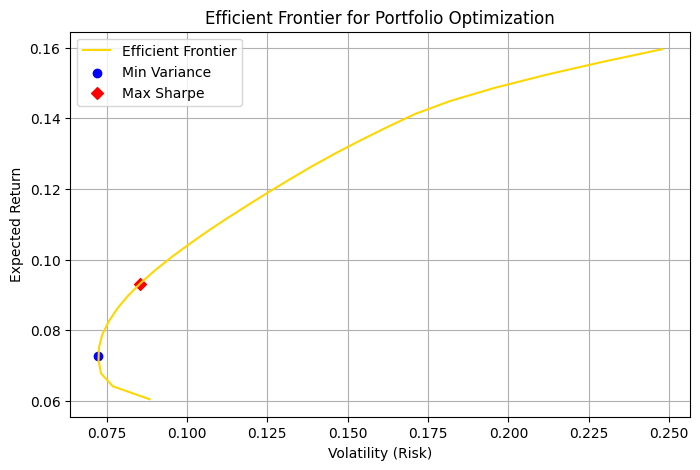

In [ ]:
# -----------------------------------------------
# Portfolio Optimization in Finance (Markowitz Model)
# -----------------------------------------------

import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Step 1: Create sample data for 4 assets
np.random.seed(42)
assets = ['Asset A', 'Asset B', 'Asset C', 'Asset D']

# Annual expected returns and volatilities
annual_returns = np.array([0.12, 0.08, 0.16, 0.06])   # Expected returns
annual_volatility = np.array([0.18, 0.12, 0.25, 0.09]) # Risk (standard deviation)

# Correlation matrix (assumed)
correlation = np.array([
    [1.0, 0.3, 0.2, 0.1],
    [0.3, 1.0, 0.1, 0.05],
    [0.2, 0.1, 1.0, 0.15],
    [0.1, 0.05, 0.15, 1.0]
])

# Covariance matrix
cov_matrix = np.outer(annual_volatility, annual_volatility) * correlation

# Step 2: Portfolio performance functions
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility

def negative_sharpe(weights, mean_returns, cov_matrix, risk_free=0.02):
    returns, volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (returns - risk_free) / volatility
    return -sharpe_ratio  # Negative for minimization

def portfolio_variance(weights, mean_returns, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Step 3: Constraints and bounds
num_assets = len(assets)
bounds = tuple((0, 1) for _ in range(num_assets))
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
initial_guess = num_assets * [1.0 / num_assets]

# Step 4: Minimum Variance Portfolio
min_var = minimize(portfolio_variance, initial_guess,
                   args=(annual_returns, cov_matrix),
                   method='SLSQP', bounds=bounds, constraints=constraints)

min_var_weights = min_var.x
min_var_ret, min_var_vol = portfolio_performance(min_var_weights, annual_returns, cov_matrix)

# Step 5: Maximum Sharpe Ratio Portfolio
max_sharpe = minimize(negative_sharpe, initial_guess,
                      args=(annual_returns, cov_matrix, 0.02),
                      method='SLSQP', bounds=bounds, constraints=constraints)

max_sharpe_weights = max_sharpe.x
max_sharpe_ret, max_sharpe_vol = portfolio_performance(max_sharpe_weights, annual_returns, cov_matrix)
sharpe_ratio = (max_sharpe_ret - 0.02) / max_sharpe_vol

# Step 6: Efficient Frontier
target_returns = np.linspace(0.02, 0.20, 50)
efficient_vols = []

for t in target_returns:
    cons = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x, target=t: np.dot(x, annual_returns) - target}
    )
    res = minimize(portfolio_variance, initial_guess,
                   args=(annual_returns, cov_matrix),
                   method='SLSQP', bounds=bounds, constraints=cons)
    if res.success:
        efficient_vols.append(np.sqrt(res.fun))
    else:
        efficient_vols.append(None)

# Step 7: Print Results
print("===== Minimum Variance Portfolio =====")
print(f"Weights: {dict(zip(assets, np.round(min_var_weights, 4)))}")
print(f"Expected Annual Return: {min_var_ret:.4f}")
print(f"Volatility: {min_var_vol:.4f}\n")

print("===== Maximum Sharpe Ratio Portfolio =====")
print(f"Weights: {dict(zip(assets, np.round(max_sharpe_weights, 4)))}")
print(f"Expected Annual Return: {max_sharpe_ret:.4f}")
print(f"Volatility: {max_sharpe_vol:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Step 8: Plot Efficient Frontier
plt.figure(figsize=(8,5))
plt.plot(efficient_vols, target_returns, 'gold', label='Efficient Frontier')
plt.scatter(min_var_vol, min_var_ret, color='blue', marker='o', label='Min Variance')
plt.scatter(max_sharpe_vol, max_sharpe_ret, color='red', marker='D', label='Max Sharpe')
plt.title('Efficient Frontier for Portfolio Optimization')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Result:for constructing a  optimal portfolios by balancing expected return and risk using the Markowitz mean–variance framework, and to find (a) the minimum-variance portfolio and (b)
the maximum-Sharpe-ratio portfolio, was completed and executed sucessfully.